In [63]:
import numpy as np
import math
from scipy import integrate

total_sample=10000;
sum=0;

for i in range(0,total_sample):
    u = np.random.rand();
    sum=sum+4*math.exp((4*u-2) + ((4*u-2)**2))

answer = sum/total_sample;

invexp = lambda x: np.exp(x+x**2)
theo = integrate.quad(invexp, -2, 2)

print('Experiment result:',str(answer),'Theoretical result:',str(theo))


Experiment result: 93.6328413362832 Theoretical result: (93.16275329244199, 1.6178564393058878e-09)


In [44]:
import numpy as np
import math
total_sample=10000;
sum=0;

for i in range(0,total_sample):
    u = np.random.rand();
    sum=sum+2*math.exp(-((1/u)-1)**2)*((1/u)**2)

answer = sum/total_sample;

invexp = lambda x: np.exp(-x**2)
theo = integrate.quad(invexp, -np.inf, np.inf)

print('Experiment result:',str(answer),'Theoretical result:',str(theo))


Experiment result: 1.7741771311742773 Theoretical result: (1.7724538509055159, 1.4202636781830878e-08)


In [52]:
import numpy as np
import math
total_sample=10000;
sum=0;

for i in range(0,total_sample):
    u = np.random.rand();
    u2 = np.random.rand();
    sum=sum+math.exp(-(u+u2)**2)

answer = sum/total_sample;

f = lambda y, x: np.exp(-(x+y)**2)
theo = integrate.dblquad(f, 0, 1, lambda x: 0, lambda x: 1)

print('Experiment result:',str(answer),'Theoretical result:',str(theo))

Experiment result: 0.4133790590656576 Theoretical result: (0.4117928941729141, 8.276155368153834e-15)


<Figure size 800x600 with 1 Axes>

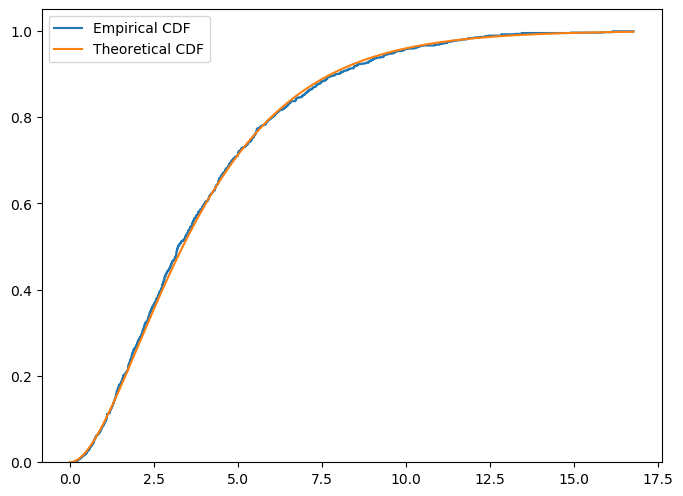

The lower bound is:  0.02174528036767115
The 25% percentile empirical value is:  0.25075000000000003
The 50% percentile empirical value is:  0.5005
The 90% percentile empirical value is:  0.9001
The 25% percentile theoretical value is:  0.237141171210702
The 50% percentile theoretical value is:  0.4781144096404662
The 90% percentile theoretical value is:  0.9053291645007661


In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2


def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(y)

n=1000;
x=[];
    
for ten_range in range(0,n):
    z1= np.random.randn();
    z2= np.random.randn();
    z3= np.random.randn();
    z4= np.random.randn();
    x.append(z1**2+z2**2+z3**2+z4**2)
    
x = np.sort(x, axis=None)
t = np.linspace(0,max(x),n)
y = chi2.cdf(t, 4)

fig = plt.figure(figsize=(8,6),dpi=100)
plt.step(x,np.arange(0,1,1/n), label='Empirical CDF')
plt.plot(t,y, label='Theoretical CDF')
plt.ylim((0,1.05))
plt.legend()
plt.show()
f=ecdf(x)
lower_bound_value=[];

y1 = np.zeros(n)
h=np.arange(0,1,1/n);

lower_bound = max(abs(h-chi2.cdf(x, 4)))
y_output =chi2.cdf(x, 4);

print('The lower bound is: ',str(lower_bound))
print('The 25% percentile empirical value is: ',str(np.percentile(f,25)))
print('The 50% percentile empirical value is: ',str(np.percentile(f,50)))
print('The 90% percentile empirical value is: ',str(np.percentile(f,90)))
print('The 25% percentile theoretical value is: ',str(np.percentile(y_output,25)))
print('The 50% percentile theoretical value is: ',str(np.percentile(y_output,50)))
print('The 90% percentile theoretical value is: ',str(np.percentile(y_output,90)))



In [15]:
import numpy as np
from scipy import stats
from sklearn.utils import resample
import math
from random import random


file = open("data1.txt","r")
file2 = open("data2.txt","r")
a=95
#Repeat for each song in the text file
eruptions =[];
waiting=[];
for line in file:
    eruptions.append(float(line))
for line2 in file2:
    waiting.append(float(line2))
file.close()
file2.close()
#first 15 number
waiting_15 = waiting[:15]
eruptions_15 = eruptions[:15]
#statistical confidence interval of 15 samples
standard_error = np.std(waiting_15)/np.sqrt(len(waiting_15))
scaling =  stats.t.ppf(0.025, len(waiting_15)-1)
scaling2 =  stats.t.ppf(0.975, len(waiting_15)-1)
confidence_low = np.mean(waiting_15) + standard_error*scaling;
confidence_high = np.mean(waiting_15) + standard_error*scaling2;
print('The ',str((100-a)/2),'% percentile of 15 samples is: ',str(confidence_low))
print('The ',str((100+a)/2),'% percentile of 15 samples is: ',str(confidence_high))

#statistical confidence interval of all samples
standard_error = np.std(waiting)/np.sqrt(len(waiting))
scaling =  stats.t.ppf(0.025, len(waiting)-1)
scaling2 =  stats.t.ppf(0.975, len(waiting)-1)
confidence_low = np.mean(waiting) + standard_error*scaling;
confidence_high = np.mean(waiting) + standard_error*scaling2;
print('The ',str((100-a)/2),'% percentile of all samples is: ',str(confidence_low))
print('The ',str((100+a)/2),'% percentile of all samples is: ',str(confidence_high))

#Bootstrap confidence interval of 15 samples
y1 = np.zeros(1000)
for i in range(1,1000):
    index=[];
    all_number=[];
    value = 272*np.random.rand(15,1);
    for j in range(0,15):
        index.append(math.ceil(value[j]))
    for j in range(0,15):
        ind = index[j]-1;
        all_number.append(waiting[ind])
    y1[i] = np.mean(all_number);
y1 = np.sort(y1);
per_1 = np.percentile(X, (100-a)/2,interpolation='nearest')
per_2 = np.percentile(X, (100+a)/2,interpolation='nearest')
print('The ',str((100-a)/2),'% percentile of 15 samples is: ',str(y1[25]))
print('The ',str((100+a)/2),'% percentile of 15 samples is: ',str(y1[975]))

#Bootstrap confidence interval of all samples
y = np.zeros(1000)
for i in range(1,1000):
    index=[];
    all_number=[];
    value = 272*np.random.rand(272,1);
    for j in range(0,272):
        index.append(math.ceil(value[j]))
    for j in range(0,272):
        ind = index[j]-1;
        all_number.append(waiting[ind])
    y[i] = np.mean(all_number);
y = np.sort(y);
per_1 = np.percentile(X, (100-a)/2,interpolation='nearest')
per_2 = np.percentile(X, (100+a)/2,interpolation='nearest')
print('The ',str((100-a)/2),'% percentile of all samples is: ',str(y[25]))
print('The ',str((100+a)/2),'% percentile of all samples is: ',str(y[975]))


The  2.5 % percentile of 15 samples is:  62.841129828135855
The  97.5 % percentile of 15 samples is:  79.02553683853083
The  2.5 % percentile of all samples is:  69.2771667513403
The  97.5 % percentile of all samples is:  72.51695089571851
The  2.5 % percentile of 15 samples is:  64.13333333333334
The  97.5 % percentile of 15 samples is:  77.86666666666666
The  2.5 % percentile of all samples is:  69.31985294117646
The  97.5 % percentile of all samples is:  72.53308823529412
